# Notebook Tarea 2 Sistemas distribuidos

### Importación de librerías

In [1]:
import lithops
import pandas as pd
from io import StringIO
from pandasql import sqldf
import pandasql
from lithops import Storage
from lithops import FunctionExecutor
from pylab import *
import matplotlib.pyplot as plt
import sqlalchemy

### Variables globales

In [2]:
fexec = lithops.FunctionExecutor(runtime = 'enzeax/dockerfile:0.4',runtime_memory=2048)

2021-06-29 18:55:44,228 [INFO] lithops.config -- Lithops v2.3.4
2021-06-29 18:55:44,285 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-06-29 18:55:44,288 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-de - Namespace: Namespace-1441991
2021-06-29 18:55:44,289 [INFO] lithops.executors -- Serverless Executor created with ID: 12a15e-0


### Funciones auxiliares

In [3]:
def formateo(pandaQuery):
    pandaQuery = pandaQuery.str.replace('00:00:00.000000','',regex=True)
    pandaQuery = pandaQuery.str.replace('2020','20',regex=True)
    pandaQuery = pandaQuery.str.replace('2021','21',regex=True)
    return pandaQuery

In [4]:
def grafico(pandaQuery, x, y):
    fig, ax = plt.subplots(figsize=(16, 7))
    pandaQuery[x] = formateo(pandaQuery[x])
    ax.plot(pandaQuery[x], pandaQuery[y])
    plt.show()

In [5]:
def getDataInfo(selectQuery):
    storage = Storage()
    data = storage.get_object('test-bucket-1441991', 'database.csv')

    format_data = str(data[0:-1], 'utf-8')
    database = pd.read_csv(StringIO(format_data))

    database["TipusCasData"]= pd.to_datetime(database["TipusCasData"])
    database = database.sort_values(by="TipusCasData")
    query = sqldf(selectQuery)

    return query

In [6]:
def graph_plot_multiline(query1, x1, y1, label1, query2, x2, y2, label2):
    fig, ax = plt.subplots(figsize=(16, 7))
    query1[x1] = formateo(query1[x1])
    ax.plot(query1[x1], query1[y1], label = label1)
    query2[x2] = formateo(query2[x2])
    ax.plot(query2[x2], query2[y2], label = label2)
    plt.legend()
    plt.show()

### Query 1: consulta número de casos tiempo tarragona

In [10]:
fexec.call_async(getDataInfo, "SELECT NumCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' GROUP BY TipusCasData", runtime_memory=2048)
query = fexec.get_result()

2021-06-29 18:56:20,929 [INFO] lithops.invokers -- ExecutorID 12a15e-0 | JobID A002 - Selected Runtime: enzeax/dockerfile:0.4 - 2048MB
2021-06-29 18:56:20,933 [INFO] lithops.job.job -- ExecutorID 12a15e-0 | JobID A002 - Uploading function and data - Total: 1.1KiB
2021-06-29 18:56:21,204 [INFO] lithops.invokers -- ExecutorID 12a15e-0 | JobID A002 - Starting function invocation: getDataInfo() - Total: 1 activations
2021-06-29 18:56:21,210 [INFO] lithops.invokers -- ExecutorID 12a15e-0 | JobID A002 - View execution logs at /tmp/lithops/logs/12a15e-0-A002.log
2021-06-29 18:56:21,220 [INFO] lithops.wait -- ExecutorID 12a15e-0 - Getting results from functions


2021-06-29 18:56:31,332 [INFO] lithops.executors -- ExecutorID 12a15e-0 - Cleaning temporary data


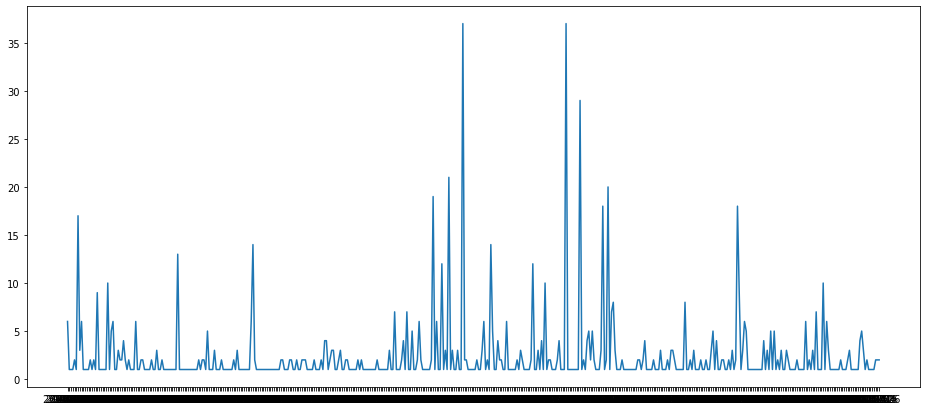

In [11]:
query['TipusCasData'] = formateo(query['TipusCasData'])
grafico(query, 'TipusCasData', 'NumCasos')

### Query 2: consulta número de casos por comarca A-I

In [12]:
fexec.call_async(getDataInfo, "SELECT SUM(NumCasos) AS TotalCasos, ComarcaDescripcio FROM database WHERE ComarcaDescripcio < 'I%'  GROUP BY ComarcaDescripcio", runtime_memory=2048)
query = fexec.get_result()

2021-06-29 18:56:34,508 [INFO] lithops.invokers -- ExecutorID 12a15e-0 | JobID A003 - Selected Runtime: enzeax/dockerfile:0.4 - 2048MB
2021-06-29 18:56:34,512 [INFO] lithops.job.job -- ExecutorID 12a15e-0 | JobID A003 - Uploading function and data - Total: 1.1KiB
2021-06-29 18:56:34,841 [INFO] lithops.invokers -- ExecutorID 12a15e-0 | JobID A003 - Starting function invocation: getDataInfo() - Total: 1 activations
2021-06-29 18:56:34,842 [INFO] lithops.invokers -- ExecutorID 12a15e-0 | JobID A003 - View execution logs at /tmp/lithops/logs/12a15e-0-A003.log
2021-06-29 18:56:34,845 [INFO] lithops.wait -- ExecutorID 12a15e-0 - Getting results from functions


2021-06-29 18:56:44,926 [INFO] lithops.executors -- ExecutorID 12a15e-0 - Cleaning temporary data


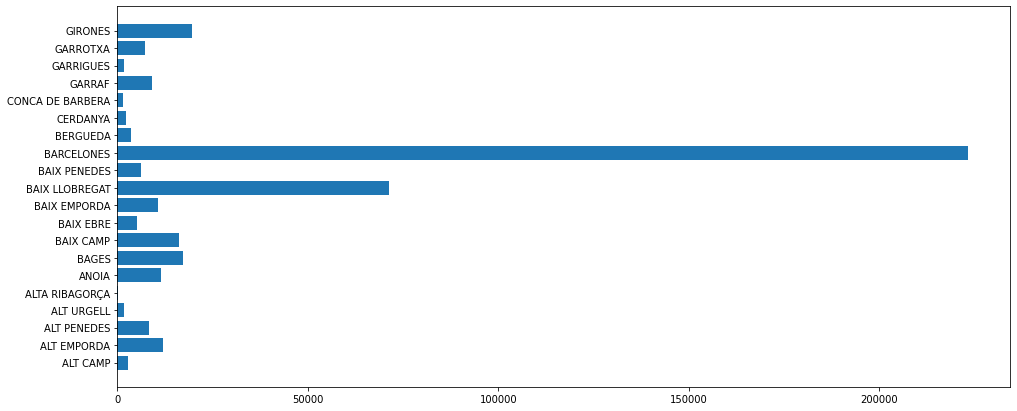

In [13]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.barh(query['ComarcaDescripcio'], query['TotalCasos'])
plt.show()

### Query 3: consulta número de casos por comarca I-Z

In [ ]:
fexec.call_async(getDataInfo, "SELECT SUM(NumCasos) AS TotalCasos, ComarcaDescripcio FROM database WHERE ComarcaDescripcio >= 'I%'  GROUP BY ComarcaDescripcio", runtime_memory=2048)
query = fexec.get_result()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.barh(query['ComarcaDescripcio'], query['TotalCasos'])
plt.show()

### Query 4: consulta número casos en un mes de todas las comarcas

In [ ]:
fexec.call_async(getDataInfo, "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE TipusCasData BETWEEN '2020-01-01' AND '2020-02-01' GROUP BY TipusCasData", runtime_memory=2048)
query = fexec.get_result()

In [ ]:
query['TipusCasData'] = formateo(query['TipusCasData'])
grafico(query, 'TipusCasData', 'TotalCasos')

### Query 5: consulta paralelizadas de número de casos de la comarca de Tarragona

In [ ]:
fexec.map(getDataInfo, [
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-01-01' AND '2020-03-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-03-01' AND '2020-05-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-05-01' AND '2020-07-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-07-01' AND '2020-09-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-09-01' AND '2020-11-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-11-01' AND '2021-01-01' GROUP BY TipusCasData"
    ])
query = fexec.get_result()

In [ ]:
for q in query:
        grafico(q, 'TipusCasData', 'TotalCasos')

### Query 6: consulta número de alta diarias y defunciones diarias a lo largo del 2020

In [ ]:
fexec.map(getDataInfo, [
    "SELECT DISTINCT TipusCasData, AltesDiaries FROM database WHERE AltesDiaries IS NOT NULL",
    "SELECT DISTINCT TipusCasData, DefuncionsDiaries FROM database WHERE AltesDiaries IS NOT NULL"
])
query = fexec.get_result()

In [ ]:
graph_plot_multiline(query[0], 'TipusCasData', 'AltesDiaries', 'Altes diàries', query[1], 'TipusCasData', 'DefuncionsDiaries', 'Defuncions diàries')